# Solid Waste Analysis
##Question
It is important for the City of Baltimore to provide services equitably to residents. A key performance indicator (KPI) of many city services is on time completion (completing work before the due date). Solid Waste would like to assess the performance of their services (SR Type), specifically Cleaning, Boarding, High Grass and Weeds (HGW), Dirty Streets, and Dirty Alleys. 





In [ ]:
#This originally imported the Excel doc and saved it off as a pickle file for quick access.
"""import pandas as pd 
original_recs = pd.read_excel(r'311_CSR_SW.xlsx')
original_recs.to_pickle('311_CSR_SW.pkl')
original_recs.head()"""

## Initialize Clean Records Dataframe
"Please ignore any services labeled as “proactive”, or status noted as duplicate. Using the dataset “311_CSR” provided and filtering to only include work created from January 1, 2017- December 31, 2019." 

In [ ]:
import pandas as pd
original_recs = pd.read_pickle(r"311_CSR_SW.pkl")

non_proactive_recs = original_recs.loc[original_recs["SR Type"].str.contains('Proactive')==False]
non_duplicate_recs = non_proactive_recs.loc[non_proactive_recs["SR Status"].str.contains('Duplicate')==False]

clean_recs = non_duplicate_recs[(non_duplicate_recs['Created Date'] > '2017-01-01 00:00:01') & (non_duplicate_recs['Created Date'] < '2019-12-31 23:59:59')]

### Question 1
How many of each type of service requests were created each year from 2017-2019?


In [ ]:
service_groups = clean_recs.groupby(['SR Type'])
service_groups.size()

What % of service requests were overdue each year? 


In [79]:
overdue_recs = clean_recs.loc[clean_recs["Due Date"] < clean_recs["Close Date"]]
len(overdue_recs)

88068

How did % overdue change overtime?

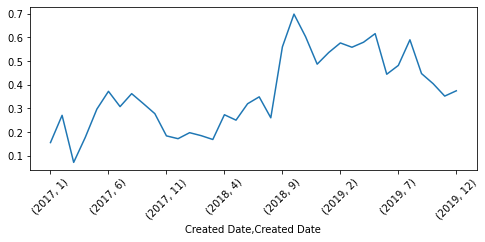

In [80]:
recs_and_overdue = clean_recs
recs_and_overdue["Overdue"] = (clean_recs["Due Date"] - clean_recs["Close Date"]) < pd.Timedelta(0)
by_complete_date_group = recs_and_overdue.groupby([recs_and_overdue["Created Date"].dt.year,recs_and_overdue["Created Date"].dt.month])

overdue_percent = by_complete_date_group["Overdue"].apply(lambda x : x.sum()/len(x))
overdue_percent.plot(kind="line", rot=45, figsize=(8,3))


Using the information calculated above and other information from the dataset, can you provide evidence to determine if service requests created in 2019 are being completed equitably across the city? 

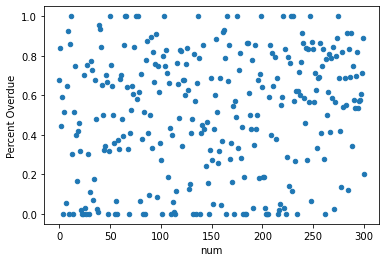

In [81]:
import numpy as np
recs_2019 = clean_recs.loc[clean_recs["Created Date"].dt.year == 2019]

neighborhood_groups = recs_2019.groupby("Neighborhood")

overdue_by_hood = neighborhood_groups["Overdue"].apply(lambda x : x.sum()/len(x)).reset_index(name="Percent Overdue")

overdue_by_hood.sort_values(by="Percent Overdue")
overdue_by_hood["num"] = np.arange(0,len(overdue_by_hood))
overdue_by_hood.plot(y="Percent Overdue",x="num", kind="scatter")

You may also provide any additional insights that you found while exploring the data.

Query Census Data for each neighborhood

In [89]:
neighborhood_centers = pd.DataFrame(neighborhood_groups[["Latitude","Longitude"]].apply(lambda x : (x["Latitude"].mean(), x["Longitude"].mean())))
neighborhood_centers.columns = ["Lat and Lon"]
neighborhood_centers

,Lat and Lon
Neighborhood,
Abell,"(39.32604596223743, -76.61128419844717)"
Allendale,"(39.29141190741536, -76.67904381850761)"
Arcadia,"(39.33238698087185, -76.56821270660478)"
Arlington,"(39.347881707991036, -76.68166248261765)"
Armistead Gardens,"(39.30512165977306, -76.55236004445896)"
...,...
Wrenlane,"(39.345051717830415, -76.60646701059169)"
Wyman Park,"(39.3311236546791, -76.62692000883078)"
Wyndhurst,"(39.35756833517014, -76.63117158625735)"


In [91]:
import requests

def get_FIPS(hood):
    if type(hood) == type(()):
        lat=hood[0]
        lon=hood[1]
        query = "https://geo.fcc.gov/api/census/block/find?latitude={}&longitude={}&showall=false&format=json".format(lat,lon)
        hood_resp = requests.get(query).json()
        return hood_resp['Block']['FIPS']

neighborhood_centers["FIPS Code"] = neighborhood_centers["Lat and Lon"].apply(get_FIPS)
neighborhood_centers

,Lat and Lon,FIPS Code
Neighborhood,,
Abell,"(39.32604596223743, -76.61128419844717)",245101202012005
Allendale,"(39.29141190741536, -76.67904381850761)",245102007014043
Arcadia,"(39.33238698087185, -76.56821270660478)",245102701012039
Arlington,"(39.347881707991036, -76.68166248261765)",245102718012000
Armistead Gardens,"(39.30512165977306, -76.55236004445896)",245102604012034
...,...,...
Wrenlane,"(39.345051717830415, -76.60646701059169)",245102710011000
Wyman Park,"(39.3311236546791, -76.62692000883078)",245101306002002
Wyndhurst,"(39.35756833517014, -76.63117158625735)",245102713002002


In [78]:
api.census.gov/data/{YEAR}/{DATASET}?get={variable}&for={geography}&key={dev_key}

Neighborhood
Abell                          (39.32604596223743, -76.61128419844717)
Allendale                      (39.29141190741536, -76.67904381850761)
Arcadia                        (39.33238698087185, -76.56821270660478)
Arlington                     (39.347881707991036, -76.68166248261765)
Armistead Gardens              (39.30512165977306, -76.55236004445896)
                                           ...                        
Wyman Park                      (39.3311236546791, -76.62692000883078)
Wyndhurst                      (39.35756833517014, -76.63117158625735)
Yale Heights                  (39.275640508394275, -76.69012771751589)
York-Homeland                   (39.3533671966083, -76.61120158705948)
FIPS Code            Neighborhood
Abell                None
Allenda...
Length: 302, dtype: object